<a href="https://colab.research.google.com/github/AlirezaAhadipour/Fourier-Transform/blob/main/De_noising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Create a signal
dt = 0.001
t = np.arange(0, 1, dt)

f = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)
f_clean = f

f_noisy = f + 2.5 * np.random.randn(len(t))

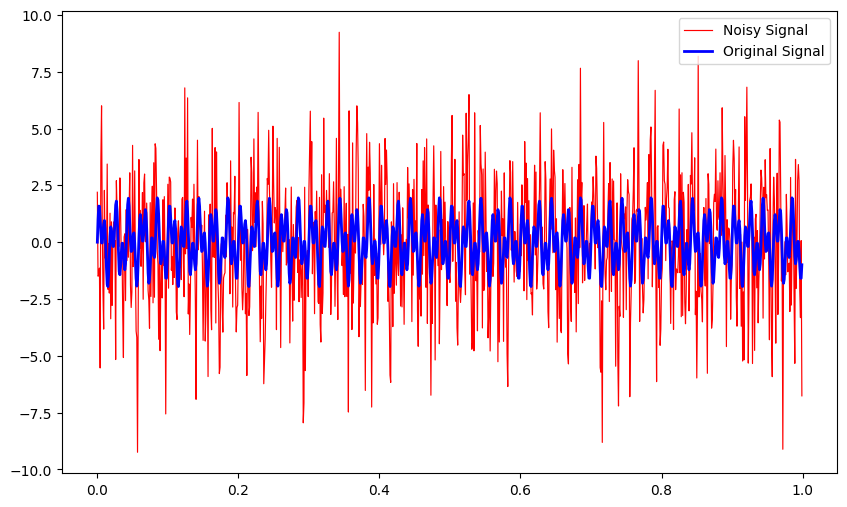

In [24]:
plt.figure(figsize=(10,6))
plt.plot(t, f_noisy, color='r', linewidth=0.85, label='Noisy Signal')
plt.plot(t, f_clean, color='b', linewidth=2, label='Original Signal')
plt.legend(loc='upper right')

In [25]:
# Compute FFT
n = len(t)
ft = np.fft.fft(f_noisy, n)
psd = ft * np.conj(ft) / n
freq = (1 / (dt * n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype=int)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


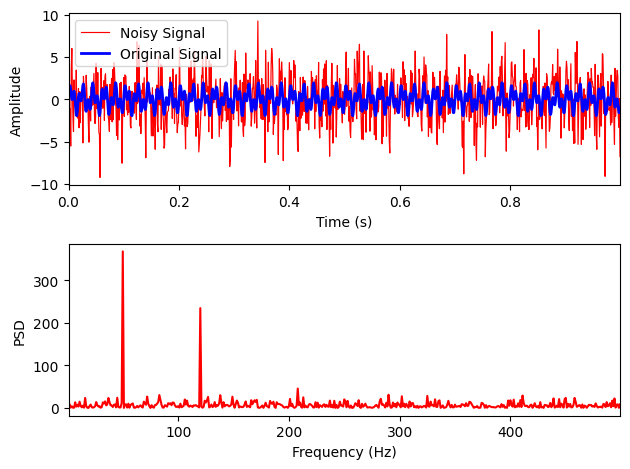

In [34]:
fig, axs = plt.subplots(2, 1)
plt.sca(axs[0])
plt.plot(t, f_noisy, color='r', linewidth=0.85, label='Noisy Signal')
plt.plot(t, f_clean, color='b', linewidth=2, label='Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], psd[L], color='r')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')

plt.tight_layout()
plt.show()

In [33]:
# Filter out the noise
indices = psd > 100
psd_filtered = psd * indices
ft_filtered = ft * indices
inv_ft = np.fft.ifft(ft_filtered)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


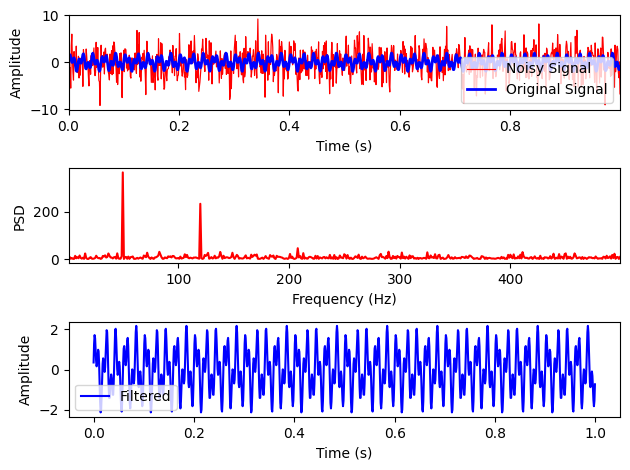

In [37]:
fig, axs = plt.subplots(3, 1)
plt.sca(axs[0])
plt.plot(t, f_noisy, color='r', linewidth=0.85, label='Noisy Signal')
plt.plot(t, f_clean, color='b', linewidth=2, label='Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], psd[L], color='r')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')

plt.sca(axs[2])
plt.plot(t, inv_ft, color='b', label='Filtered')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()